# **Detecting Cyclone Abnormal**

In [61]:
import numpy as num
import pandas as pd


In [62]:
data=pd.read_excel("data.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [63]:
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [64]:
#Check Missing Values

In [65]:
data.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


**1. Cyclone_Inlet_Gas_Temp – Temperature of Hot gas entering the cyclone.**

In [67]:
#Step 1: Converting Columns to Appropriate Data Types:

In [68]:
data['Cyclone_Inlet_Gas_Temp'] = pd.to_numeric(data['Cyclone_Inlet_Gas_Temp'], errors='coerce')

In [69]:
#Step 2: Visualize the variables over time using line plots:

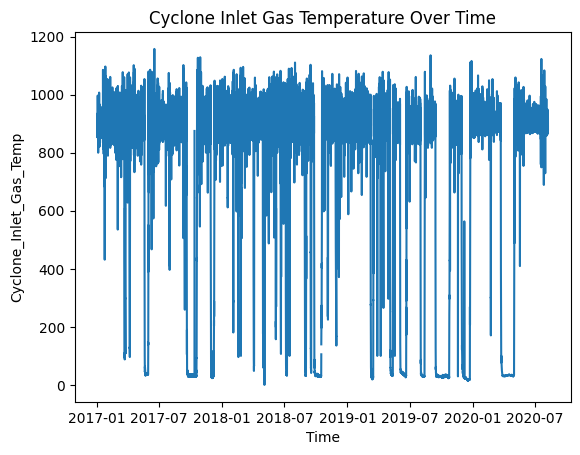

In [70]:
import matplotlib.pyplot as plt

plt.plot(data['time'], data['Cyclone_Inlet_Gas_Temp'])
plt.xlabel('Time')
plt.ylabel('Cyclone_Inlet_Gas_Temp')
plt.title('Cyclone Inlet Gas Temperature Over Time')
plt.show()


In [71]:

from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

In [72]:
# Step 3: Select the variable for anomaly detection
variable = 'Cyclone_Inlet_Gas_Temp'
X = data[variable].values.reshape(-1, 1)

In [73]:
# Step 4: Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [74]:
# Step 5: Fit the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

In [75]:
# Step 6: Predict outliers
outliers = model.predict(X)


In [76]:
# Step 7: Add outlier predictions to the DataFrame
data['Outlier'] = outliers


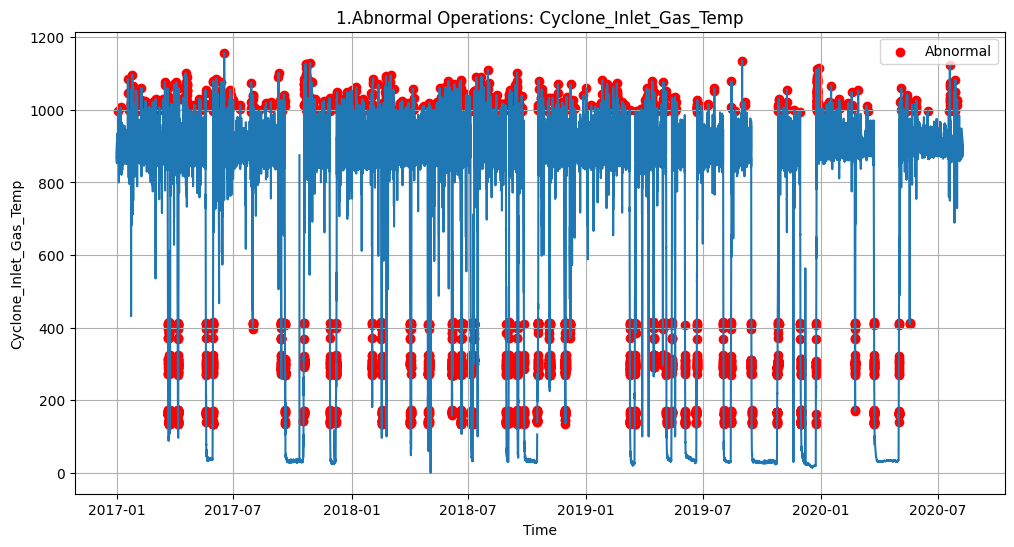

In [77]:
#Final Step: Plot the variable with highlighted abnormal periods:
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data[variable])
plt.scatter(data[data['Outlier'] == -1]['time'], data[data['Outlier'] == -1][variable], color='r', label='Abnormal')
plt.xlabel('Time')
plt.ylabel(variable)
plt.title('1.Abnormal Operations: ' + variable)
plt.legend()
plt.grid(True)
plt.show()


## **2. Cyclone_Gas_Outlet_Temp – Temperature of Hot gas leaving the cyclone**





In [79]:
#Step 1: Converting Columns to Appropriate Data Types:

In [80]:
data['Cyclone_Gas_Outlet_Temp'] = pd.to_numeric(data['Cyclone_Gas_Outlet_Temp'], errors='coerce')

In [81]:
#Step 2: Visualize the variables over time using line plots:

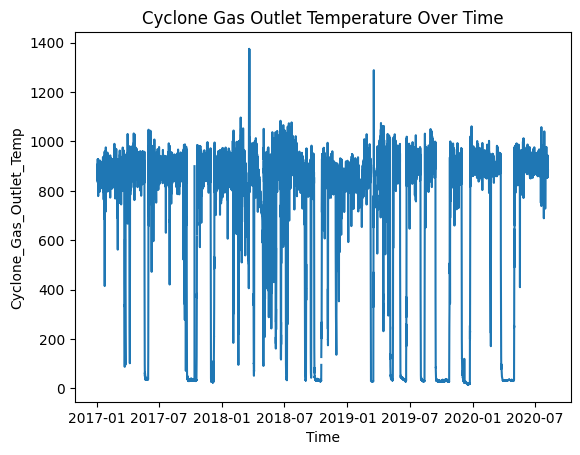

In [82]:
import matplotlib.pyplot as plt

plt.plot(data['time'], data['Cyclone_Gas_Outlet_Temp'])
plt.xlabel('Time')
plt.ylabel('Cyclone_Gas_Outlet_Temp')
plt.title('Cyclone Gas Outlet Temperature Over Time')
plt.show()


In [83]:
# Step 3: Select the variable for anomaly detection
variable = 'Cyclone_Gas_Outlet_Temp'
X = data[variable].values.reshape(-1, 1)

In [84]:
# Step 4: Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [85]:
# Step 5: Fit the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

In [86]:
# Step 6: Predict outliers
outliers = model.predict(X)


In [87]:
# Step 7: Add outlier predictions to the DataFrame
data['Outlier'] = outliers


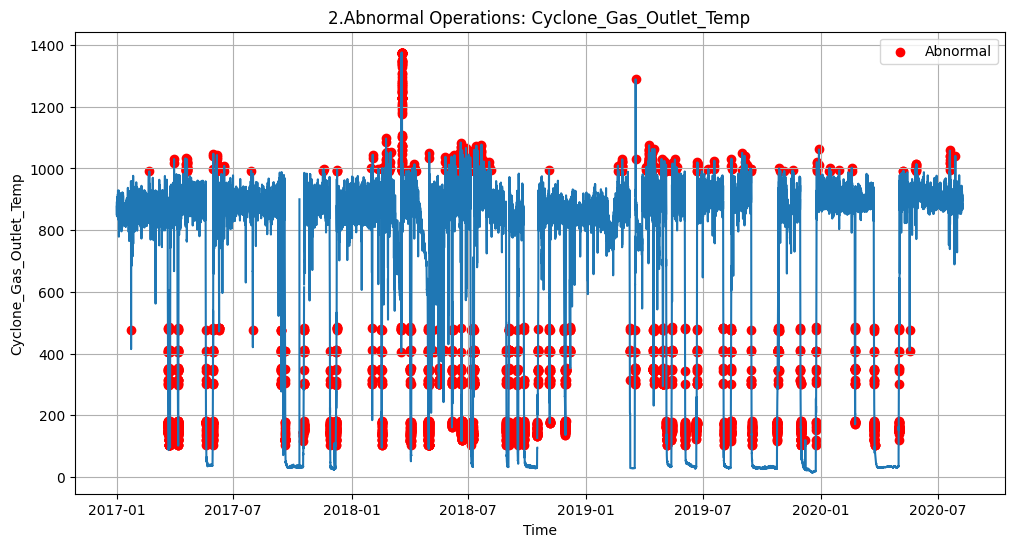

In [88]:
#Final Step: Plot the variable with highlighted abnormal periods:
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data[variable])
plt.scatter(data[data['Outlier'] == -1]['time'], data[data['Outlier'] == -1][variable], color='r', label='Abnormal')
plt.xlabel('Time')
plt.ylabel(variable)
plt.title('2.Abnormal Operations: ' + variable)
plt.legend()
plt.grid(True)
plt.show()


# **3. Cyclone_Outlet_Gas_draft – Draft (pressure) of gas at outlet of cyclone.**

In [98]:
#Step 1: Converting Columns to Appropriate Data Types:
data['Cyclone_Outlet_Gas_draft'] = pd.to_numeric(data['Cyclone_Outlet_Gas_draft'], errors='coerce')

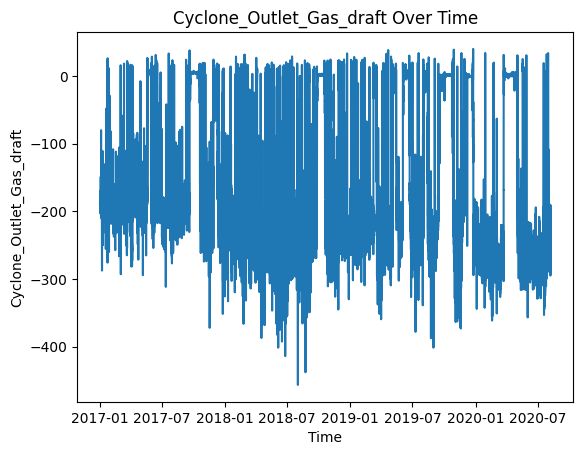

In [99]:
#Step 2: Visualize the variables over time using line plots:
import matplotlib.pyplot as plt

plt.plot(data['time'], data['Cyclone_Outlet_Gas_draft'])
plt.xlabel('Time')
plt.ylabel('Cyclone_Outlet_Gas_draft')
plt.title('Cyclone_Outlet_Gas_draft Over Time')
plt.show()


In [101]:
# Step 3: Select the variable for anomaly detection
variable = 'Cyclone_Outlet_Gas_draft'
X = data[variable].values.reshape(-1, 1)

In [102]:
# Step 4: Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [104]:
# Step 5: Fit the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

In [105]:
# Step 6: Predict outliers
outliers = model.predict(X)


In [106]:
# Step 7: Add outlier predictions to the DataFrame
data['Outlier'] = outliers


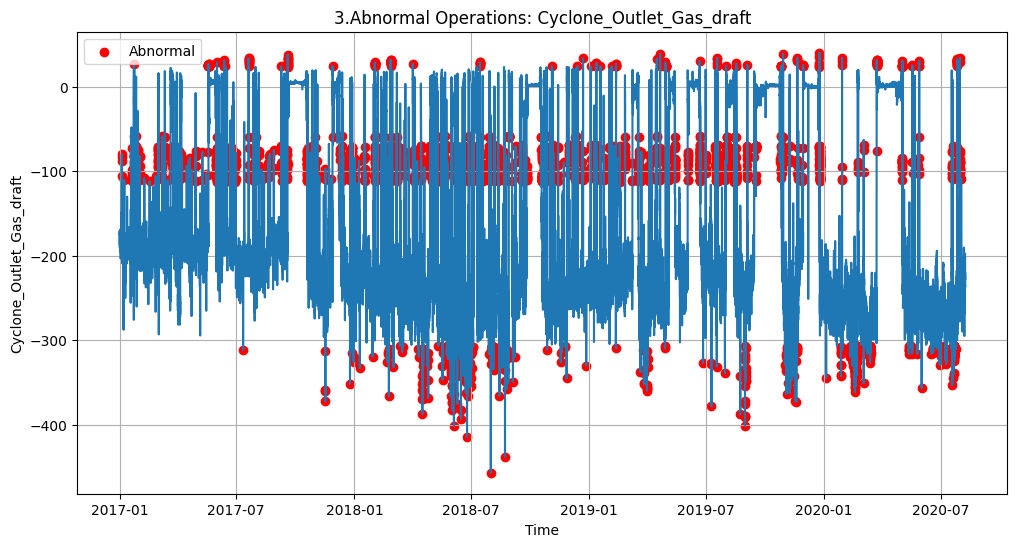

In [108]:
#Final Step: Plot the variable with highlighted abnormal periods:
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data[variable])
plt.scatter(data[data['Outlier'] == -1]['time'], data[data['Outlier'] == -1][variable], color='r', label='Abnormal')
plt.xlabel('Time')
plt.ylabel(variable)
plt.title('3.Abnormal Operations: ' + variable)
plt.legend()
plt.grid(True)
plt.show()


# **4.Cyclone_cone_draft – Draft (pressure) of gas at cone section of cyclone.**


In [109]:
#Step 1: Converting Columns to Appropriate Data Types:

data['Cyclone_cone_draft'] = pd.to_numeric(data['Cyclone_cone_draft'], errors='coerce')

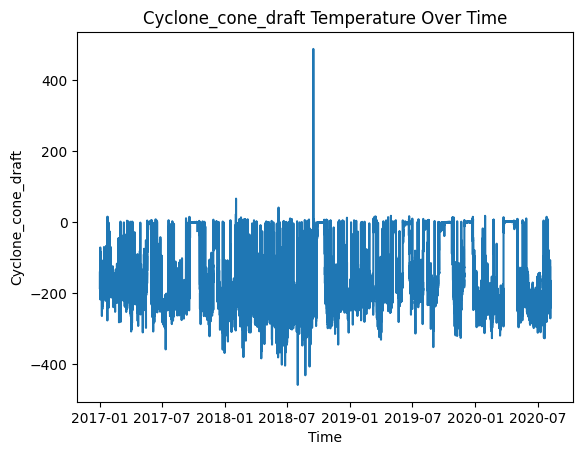

In [117]:
#Step 2: Visualize the variables over time using line plots:
import matplotlib.pyplot as plt

plt.plot(data['time'], data['Cyclone_cone_draft'])
plt.xlabel('Time')
plt.ylabel('Cyclone_cone_draft')
plt.title('Cyclone_cone_draft Temperature Over Time')
plt.show()

In [118]:
# Step 3: Select the variable for anomaly detection
variable = 'Cyclone_cone_draft'
X = data[variable].values.reshape(-1, 1)

In [119]:
# Step 4: Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [120]:

# Step 5: Fit the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(X)


IsolationForest(contamination=0.01)

In [121]:

# Step 6: Predict outliers
outliers = model.predict(X)

In [122]:
# Step 7: Add outlier predictions to the DataFrame
data['Outlier'] = outliers

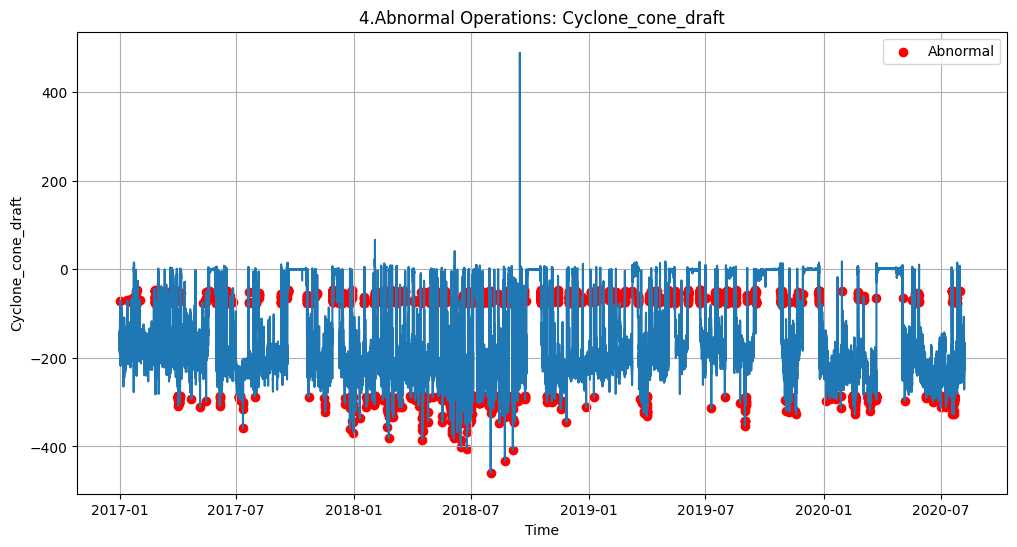

In [123]:

#Final Step: Plot the variable with highlighted abnormal periods:
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data[variable])
plt.scatter(data[data['Outlier'] == -1]['time'], data[data['Outlier'] == -1][variable], color='r', label='Abnormal')
plt.xlabel('Time')
plt.ylabel(variable)
plt.title('4.Abnormal Operations: ' + variable)
plt.legend()
plt.grid(True)
plt.show()


# **5. Cyclone_Inlet_Draft – Draft (pressure) of gas at inlet of cyclone.**


In [132]:
#Step 1: Converting Columns to Appropriate Data Types:

data['Cyclone_Inlet_Draft'] = pd.to_numeric(data['Cyclone_Inlet_Draft'], errors='coerce')

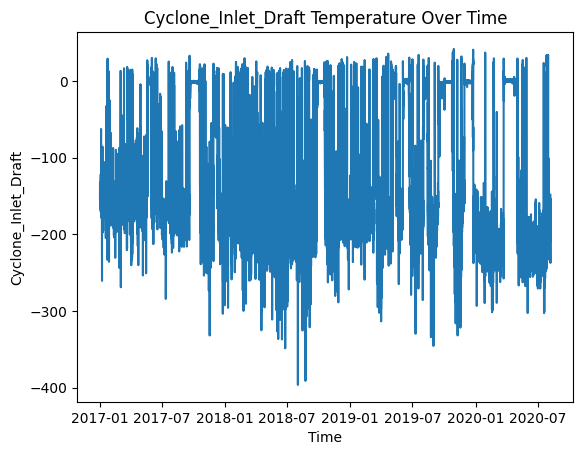

In [133]:

#Step 2: Visualize the variables over time using line plots:
import matplotlib.pyplot as plt

plt.plot(data['time'], data['Cyclone_Inlet_Draft'])
plt.xlabel('Time')
plt.ylabel('Cyclone_Inlet_Draft')
plt.title('Cyclone_Inlet_Draft Temperature Over Time')
plt.show()


In [134]:

# Step 3: Select the variable for anomaly detection
variable = 'Cyclone_Inlet_Draft'
X = data[variable].values.reshape(-1, 1)


In [135]:
# Step 4: Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [136]:
# Step 5: Fit the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

In [137]:
# Step 6: Predict outliers
outliers = model.predict(X)

In [138]:

# Step 7: Add outlier predictions to the DataFrame
data['Outlier'] = outliers

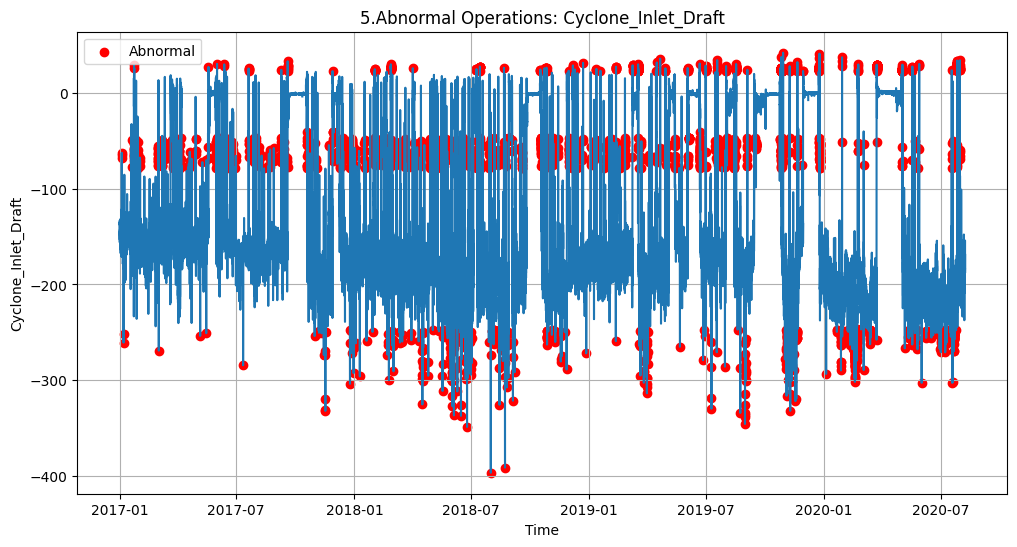

In [139]:
#Final Step: Plot the variable with highlighted abnormal periods:
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data[variable])
plt.scatter(data[data['Outlier'] == -1]['time'], data[data['Outlier'] == -1][variable], color='r', label='Abnormal')
plt.xlabel('Time')
plt.ylabel(variable)
plt.title('5.Abnormal Operations: ' + variable)
plt.legend()
plt.grid(True)
plt.show()

# **6. Cyclone_Material_Temp – Temperature of the material at the outlet of the cyclone.**

In [150]:
#Step 1: Converting Columns to Appropriate Data Types:

data['Cyclone_Material_Temp'] = pd.to_numeric(data['Cyclone_Material_Temp'], errors='coerce')

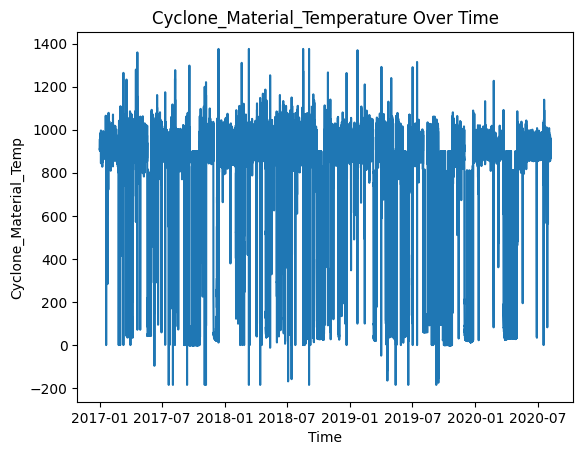

In [151]:
#Step 2: Visualize the variables over time using line plots:
import matplotlib.pyplot as plt

plt.plot(data['time'], data['Cyclone_Material_Temp'])
plt.xlabel('Time')
plt.ylabel('Cyclone_Material_Temp')
plt.title('Cyclone_Material_Temperature Over Time')
plt.show()

In [152]:

# Step 3: Select the variable for anomaly detection
variable = 'Cyclone_Material_Temp'
X = data[variable].values.reshape(-1, 1)

In [153]:
# Step 4: Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [154]:
# Step 5: Fit the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(X)


IsolationForest(contamination=0.01)

In [155]:

# Step 6: Predict outliers
outliers = model.predict(X)


In [156]:
# Step 7: Add outlier predictions to the DataFrame
data['Outlier'] = outliers


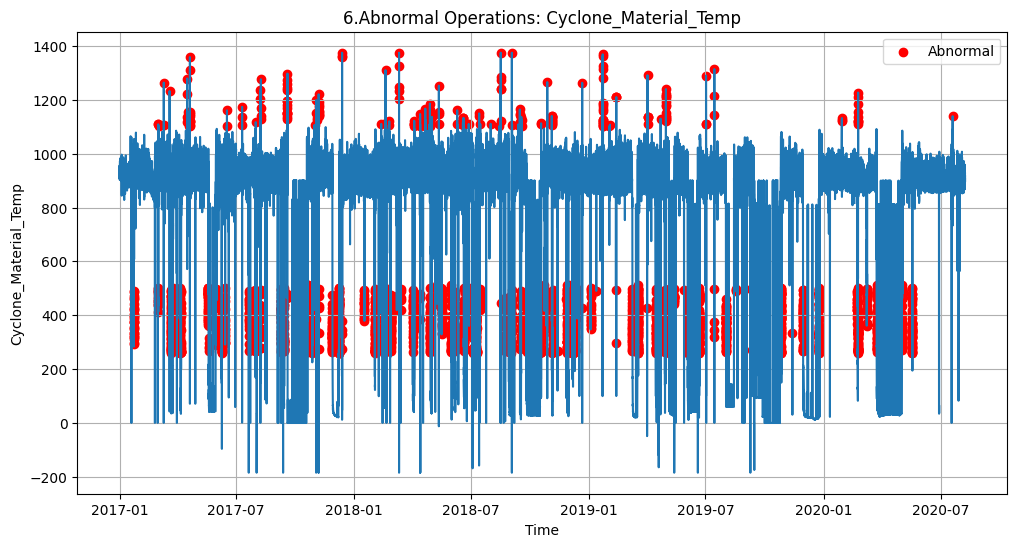

In [157]:
#Final Step: Plot the variable with highlighted abnormal periods:
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data[variable])
plt.scatter(data[data['Outlier'] == -1]['time'], data[data['Outlier'] == -1][variable], color='r', label='Abnormal')
plt.xlabel('Time')
plt.ylabel(variable)
plt.title('6.Abnormal Operations: ' + variable)
plt.legend()
plt.grid(True)
plt.show()

# **I am happy that I received a real-life example type assessment. Thank you.**





# **THANKS A LOT !!!**